Predict the daily revenue generated (in USD) based on the temperature (°C) outside


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# I using Google Colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving IceCreamData.csv to IceCreamData.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['IceCreamData.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Exploration Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


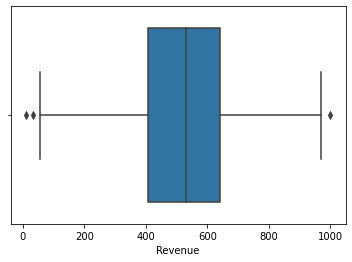

In [ ]:
sns.boxplot(df['Revenue'])
plt.show()

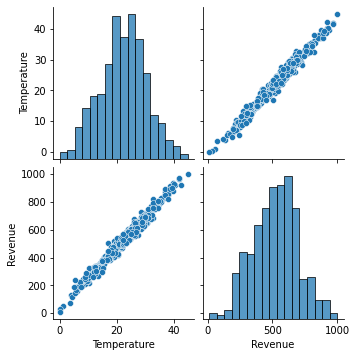

In [ ]:
sns.pairplot(df)
plt.show()

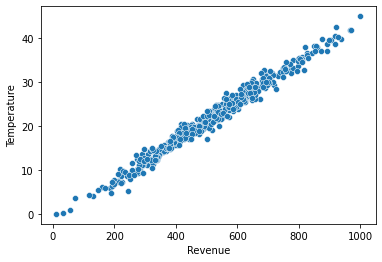

In [ ]:
# Display how temperature affect the revenue are related  using scatter plot.
sns.scatterplot(x = df['Revenue'], y = df['Temperature'])

Preprocessing

In [ ]:
# import the Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
    X = df[['Temperature']]
    y = df['Revenue']

    # split the dataset into test set and train set

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

    


In [ ]:
#initialize the linear regression model
regressor=LinearRegression()
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#fit the Linear Regression Model
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicted the result
y_pred=regressor.predict(X_test)
y_pred



array([698.3385558 , 653.32331149, 664.73027451, 450.5192845 ,
       665.47469743, 441.36861407, 584.06540609, 623.82532723,
       667.48717467, 468.72433832, 546.82733151, 443.41191785,
       622.95162777, 377.64639971, 367.0607334 , 945.67057977,
       893.79551974, 694.45445099, 546.05047608, 420.58523672,
       391.08500303, 597.0141581 , 283.23582775, 655.50055011,
       380.98796154, 412.31810124, 371.05055651, 510.23910289,
       479.70270426, 456.68206658, 640.1157508 , 281.65224383,
       314.1894674 , 470.01363777, 559.72453055, 539.75091165,
       307.72368191, 508.65180339, 571.43237276, 732.25599161,
       440.44010989, 494.39422767, 567.56536766, 443.94181482,
       914.46632525, 603.19341879, 541.83315574, 199.94980451,
       694.04258508, 351.09960842, 189.49123987, 576.80689646,
       216.55393778, 468.15141951, 461.80905978, 448.43970076,
       494.89418532, 801.3758273 , 331.24527072, 540.42751209,
       661.1953557 , 526.66690494, 360.66507037, 451.46

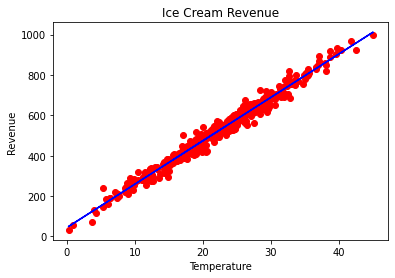

In [ ]:
# Visualizing the Result (Training_Set)
plt.scatter(X_train,y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color= 'blue' )
plt.title('Ice Cream Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

<function matplotlib.pyplot.show>

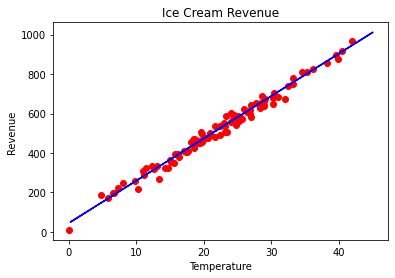

In [ ]:
# Visualizing the Result (Test Set)
plt.scatter(X_test,y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Ice Cream Revenue")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

43.73357869209326
[21.5133908]


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.303213530102884
Mean Squared Error: 528.2150684519339
Root Mean Squared Error: 22.982929936192512
